In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introdução ao processamento de sinais

---

Dentro das atividades gerais do entitulado Aprendizado de Máquina, podemos generalizar os seguintes passos:

Em um alto nível de abstração, qualquer problema envolvendo aprendizado de máquina pode ser dividido em três tipos de tarefas: 

1. Dados (ingestão/coleta dos dados, limpeza/tratamento e aprimoramento de recursos)
2. Treinamento (construção dos modelos de aprendizado de máquina usando os dados como recursos)
3. Avaliação (métricas de avaliação do modelo)

Os recursos, definidos como **"propriedades mensuráveis individuais ou características de um fenômeno que está sendo observado"**, são muito úteis porque ajudam a máquina a entender os dados e a classificá-los em categorias ou prever valores.

Tipos de dados diferentes usam técnicas de processamento diferentes. No campo do **Processamanto de Linguagem Natural**, podemos citar o **Word2vec**, que funciona muito bem para processar textos. Ele cria uma representação das palavras em vetores numéricos, onde a distância entre dois vetores de palavras determina a semelhança entre as mesmas. Se tentarmos aplicar o Word2vec em outro campo, os resultados provavelmente não farão sentido.

<div align="center" style="width: 100%;">
    <img src="imgs/word2vec-linear-relationships.svg">
</div>

No campo da **Visão Computacional**, vamos pensar na imagem como tipo de dados: ela parece uma coisa para o olho humano, mas uma máquina a vê de maneira diferente após ser transformada em recursos numéricos derivados dos valores de cada pixel, e ainda com a possibilidade de se usar diferentes filtros (dependendo da aplicação).

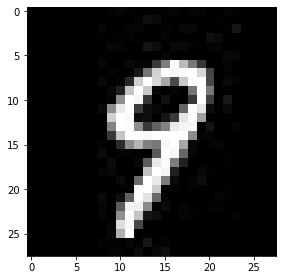

In [2]:
digit = skimage.io.imread('imgs/image_423.jpg')
skimage.io.imshow(digit)

In [3]:
digit.shape

(28, 28)

In [4]:
#digit

In [5]:
for row in digit:
    print(' '.join(['{:03d}'.format(pixel) for pixel in row]))

000 000 000 000 000 000 000 000 000 003 007 003 000 000 000 004 005 001 004 004 000 000 004 002 000 000 000 000
000 000 000 000 000 000 000 000 000 000 000 000 004 014 009 000 000 000 000 000 001 002 000 000 000 000 000 000
000 000 000 000 000 000 000 000 005 000 000 004 004 000 000 003 000 008 007 000 000 000 002 022 000 000 000 000
000 000 000 000 000 000 000 000 001 001 003 004 000 000 000 005 000 000 000 000 015 010 000 000 000 000 000 000
000 000 000 000 000 000 000 000 000 007 004 000 000 019 012 000 009 008 002 001 005 004 000 001 000 000 000 000
000 000 000 000 000 000 000 000 002 000 000 000 000 000 000 005 000 000 000 000 000 000 009 007 000 000 000 000
000 000 000 000 000 000 000 000 007 000 000 009 003 005 058 126 255 188 120 055 000 000 005 000 000 000 000 000
000 000 000 000 000 000 000 000 000 005 001 000 025 116 209 255 246 252 255 214 068 000 003 000 000 000 000 000
000 000 000 000 000 000 000 000 009 000 005 040 207 255 215 168 075 199 252 255 074 000 009 004 000 000 

## Por que estudar DSP

<div align="center" style="width: 100%;">
    <img src="imgs/datascience-conway-venn-diagram.jpg" style="width: 60%;">
    <h4 style="font-family: courier; font-size: .8em;">ref: https://www.oreilly.com/ideas/beyond-the-venn-diagram</h4>
</div>

In [6]:
s = [ 67, 111, 110, 102, 105, 114, 109, 101,  32, 113, 117, 101,  32, 117, 109,
      32, 116, 101, 120, 116, 111,  32, 112, 111, 100, 101,  32, 115, 101, 114,
      32,  99, 111, 110, 115, 105, 100, 101, 114,  97, 100, 111,  32, 117, 109,
      32, 115, 105, 110,  97, 108,  32, 110, 111,  32, 116, 101, 109, 112, 111, 33]

print(len(s))

61


In [7]:
texto = '' . join(chr(v) for v in s)
print(texto)

Confirme que um texto pode ser considerado um sinal no tempo!


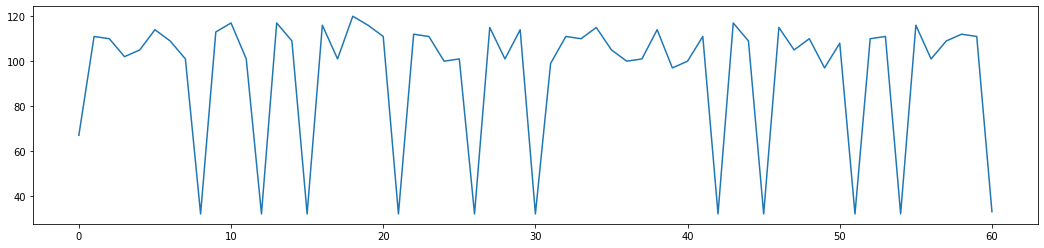

In [8]:
plt.figure(figsize=(18,4))
plt.plot(s)
plt.show()

## Conceitos básicos

### Filtragem 

O primeiro passo para converter o singal de analógico para digital é filtrar as componentes de altas freqüências. A maior parte da energia da fala está entre **200Hz** e **300Hz** e **2700Hz** e **2800Hz**. Então, assume-se uma largura de banda de **3000Hz** para fala. Uma banda de **4000Hz**, porém, é implementada nos equipamentos para evitar `aliasing`. 

### Amostragem 

O segundo passo para converter um sinal analógico de voz para digital é amostrar a entrada filtrada a uma freqüência de amostragem constante. Isso é feito através de um processo chamado `modulação por amplitude de pulso` (**PAM**). O sinal analógico original é usado para modular a amplitude um trem de pulsos com uma freqüência constante. O trem de pulsos move-se a uma freqüência constante, chamada **freqüência de amostragem**. Para determinar a freqüência de amostragem, usa-se o **Teorema de Nyquist**. 

Este teorema diz que a freqüencia de amostragem deve ser o dobro da maior freqüência do sinal amostrado. Se este teorema for obedecido, o sinal poderá ser reconstruído através de um filtro passa-baixas.

### Voz digitalizada 

Depois de filtrar e amostrar, deve-se digitalizar as amostras. O processo de digitalização é chamado `PCM`. Uma técnica chamada quantização é usada para digitalizar as amostras. 

### Pulse Code Modulation - PCM  

`PCM` é um método de codificação definido no **ITU-T G.711**. PCM: Pulse-code modulation - modulação por código de pulso. O PCM é o formato padrão de CDs de áudio, transmitindo dois canais com uma taxa de amostragem de **44.100 Hz** (amostras por segundo) e uma profundidade de **16 bits** por amostra.

### Quantização

Quando as amostras chegam na fase de quantização, elas são associadas a um intervalo de quantização. Cada intervalo de quantização é associado a um valor na forma de um número binário. Os intervalos são igualmente espaçados, assim tem-se a quantização uniforme. O tamanho padrão do número binário é **8bits**. Para um sinal amostrado a **8kHz**, a taxa de transmissão é de **64kbps**.

Quando uma amostra não é associada ao seu intervalo de quantização correto, é gerado ruído de quantização. Este ruído de quantização é equivalente ao ruído que interfere na `relação sinal ruído` (**SNR**) do sinal de voz. Um modo de reduzir o ruído de quantização é aumentar o número de intervalos de quantização, mas para isso deve-se aumentar o tamanho do valor de **8bits** para mais bits.

`SNR` é o fator que mais afeta a qualidade de voz na quantização uniforme. Para melhorar a qualidade de voz, a quantização uniforme é substituída pelo processo de quantização não-uniforme, chamado companding.

### A-law and u-law Companding  

`A-law` e `u-law` são algoritmos de compressão definidos pelo Consultative Committee for International Telephony And Telegraphy (CCITT) G.711 que comprime **PCM linear** de **16bits** em **8bits** logarítmico. 

### Sample Rate – Taxa de amostragem 

A interface de áudio é capaz de "fotografar" o sinal elétrico várias vezes durante um determinado período de tempo. A esta ação de “fotografar” chamamos de Amostragem. 

A frequência com que essa ação ocorre é chamada de Frequência de Amostragem (ou **Taxa de Amostragem**, ou **Sample Rate**), calculada por segundo, e é dada em `Hz` (hertz). Quanto maior a frequência de amostragem, mais informação é capturada do sinal elétrico a cada segundo, e mais fiel ao sinal original é o sinal digital. 

Quanto mais informação capturada, maior o espaço requerido para armazenar esta informação, e maior o poder de processamento processar estes dados. 

Portanto, não adianta você adquirir uma interface de áudio capaz de trabalhar com um sample rate de **96 kHz** (ou **96.000 Hz**), que irá gravar **96 mil pontos de informação** do seu sinal elétrico a cada segundo, se o seu computador possui pouca memória e um processador obsoleto. 

De acordo com o **Teorema de Nyquist**, o Sample Rate ideal deve ser sempre o dobro da frequência que se deseja registrar. Como o ouvido humano é capaz de perceber até **20 kHz**, uma frequência de amostragem de **40.000 Hz** é a ideal que você possa capturar toda a informação necessária para uma ótima qualidade de áudio. Trabalhar com **44.1 kHz** é mais do que suficiente. 

### Bit Rate (ou Bit Depth) – A Resolução da amostra 

A amostra é convertida para valores de **0** e **1** (binário). Quanto maior a quantidade de valores representando determinada amostra, maior é a resolução (bit rate) desta amostra. Resolução é a quantidade de informação binária (valores 0 e 1) de determinada amostra. 

> Quanto maior o bit rate, mais informação da amostra é armazenada, e mais fiel ao áudio original é o seu áudio digital. 

Uma amostra representada por um único **bit** é capaz de receber dois valores (0 ou 1). A fórmula para calcular a quantidade de valores em cada **bit** é $\large Q = 2^n$ (quantidade = dois elevado a $\large n$, sendo $\large n$ o número de bits da amostra).  

Para que dados multimídia sejam enviados, são usadas técnicas de processamento digital de sinais para codificá-los. 

### Formatos e tamanhos de arquivos

WAV é um formato de contêiner de arquivo de áudio da **Microsof/IBM**. É o formato principal usado nos sistemas Windows para armazenar áudio sem compressão e sem perdas. `WAV` é uma variante do método de formato de fluxo de bits `RIFF` para armazenar dados em "pedaços".

Esse padrão de "CD de áudio" consome aproximadamente 10 MB de espaço em disco para cada minuto de áudio. Em comparação, alguns formatos modernos, como o `FLAC`, que são compactados mas ainda sem perdas, levam cerca de **4 MB** de espaço em disco por minuto. Um formato compactado com perdas como o `MP3` ocupa muito menos espaço. Um `MP3` exportado do Audacity ou FFmpeg, com a taxa de bits padrão de **128 kbps** usa cerca de **1 MB** de espaço por minuto para um arquivo mono ou estéreo.

## Análise/Processamento de sinais 

### Sinal: definição e classificações iniciais

Em relação aos sinais, podem-se destacar as seguintes definições e considerações iniciais:

* Sinal: entidade que carrega informação.
* Visão matemática de sinal: variável funcionalmente dependente de uma ou mais variáveis independentes. Ex.: $\large y = f (x), z = f (x, y), w = f (x, y, z)$.
* Visão fı́sica de sinal: grandeza fı́sica.
* Tipos de sinais de acordo com o número de variáveis independentes:
    * Unidimensional. Ex.: áudio = $\large f (t)$.
    * Bidimensional. Ex.: imagem = $\large f (x, y)$.
    * Tridimensional. Ex.: vı́deo = $\large f (x, y, t)$.
    * Multidimensional. Ex.: tomografia/sismologia = $\large f (v 1 (t), v 2 (t), · · · , v V (t), t)$.
* Tipos de sinais de acordo com o tipo das variáveis:
    * Sinal analógico: todas as variáveis são contı́nuas.
    * Sinal amostrado: discretização das variáveis independentes (amostragem).
    * Sinal quantizado: discretização da variável dependente (quantização).
    * Sinal digital: todas as variáveis são discretas (amostragem + quantização).
* Sinal amostrado e sinal digital: conjunto ordenado de valores numéricos (seqüência numérica).

### Processamento de sinais

Algumas das definições básicas em processamento de sinais são as seguintes:

* Objeto do processamento: sinal (definido como uma entidade que carrega informação).
* Agente do processamento: sistema.
    * “Um sistema é um cojunto de elementos, que interagem entre si, com o objetivo de realizar uma determinada função”.
    * Arquitetura de um sistema: variáveis, elementos, topologia e função.
* Domı́nio do processamento: domı́nio no qual a função do agente é definida.
    * Tempo/espaço (forma) × freqüência (composição espectral).
* Ação do processamento: função exercida pelo agente sobre o objeto.
    * Conformação (tempo/espaço) × Alteração espectral (freqüência).
* Arquitetura genérica do processamento:
    * Sinal de entrada (ou estı́mulo ou excitação ou perturbação).
    * Condições iniciais ou estado inicial.
    * Sistema.
    * Sinal de saı́da (ou resposta).
* Nomenclatura usual: "Sinal" (sinal desejado) × "Ruı́do" (sinal indesejado).

#### Conceitos importantes

* A ideia do Processamento Discreto de Sinais Analógicos baseia-se em transformar o sinal analógico em um sinal discreto, processar o sinal discreto e transformar o sinal discreto processado em um sinal analógico.
* A ideia do Processamento Digital de Sinais Analógicos baseia-se em transformar o sinal analógico em um sinal discreto, transformar o sinal discreto em um sinal digital (números), processar o sinal digital, transformar o sinal digital processado em um sinal discreto e transformar o sinal discreto processado em um sinal analógico.
* Para garantir que ambos os tipos de processamento produzam resultados satisfatórios, deve-se recorrer a uma fundamentação matemática que descreva como a informação carregada pelos sinais envolvidos é afetada em cada etapa do processo.
* A modelagem de sinais e sistemas analógicos fundamenta-se na matemática contı́nua.
* A modelagem de sinais e sistemas discretos/digitais baseia-se na matemática discreta.
* Estes dois tipos de modelagem coexistem, independentemente um do outro.
* Porém, é possı́vel que se estabeleça uma relação entre eles. Com isso, pode-se representar um deles por meio do outro, pode-se teorizar um deles por meio do outro e pode-se realizar cálculos de um deles por meio do outro.
* Em alguns casos, essa representação mútua é uma relação biunı́voca exata. Em outros, isso não é possı́vel, obtendo-se apenas uma aproximação inexata de um modelo pelo outro.
* Os mecanismos que permitem a conexão entre os modelos analógico e discreto/digital são a amostragem e a interpolação.
* A amostragem permite a conexão “Analógico → Discreto” e, conseqüentemente, a conexão “Analógico → Digital” ou A/D.
* A interpolação possibilita a conexão “Discreto → Analógico” e, conseqüentemente, a conexão “Digital → Analógico” ou D/A.


## Sinal Contínuo x Discreto 

Os sinais analógicos são por natureza contínuos no tempo. São teoricamente constituídos por uma sequência de infinitos pontos. Quando digitalizamos esses sinais, eles passam por um processo conhecido por amostragem e são transformados numa sequência finita de pontos discretos. Essa transformação é realizada por componentes conhecidos como conversores **Analógicos / Digitais** ou simplesmente conversores A/D. A transformação dos sinais digitais em analógicos é realizada por componentes eletrônicos conhecidos por conversores Digitais / Analógicos, ou conversores D/A. Na FIGURA 3, pode-se observar um exemplo do processo de transformação do sinal analógico contínuo em um sinal discretizado.  

<div align="center" style="width: 100%;">
    <img src="imgs/amostragem.jpg">
</div>

O efeito decorrente devido à amostragem do sinal é visível: O sinal discretizado não é exatamente igual ao sinal analógico. Na **FIGURA ACIMA** o sinal discretizado é uma reprodução grosseira do sinal original. Isso tem uma série de consequências e implicações. Por outro lado, transformar um sinal contínuo em sinal discreto traz as vantagens de se poder adequar o  tamanho do sinal a ser processado à capacidade limitada de memória dos processadores. A memória do processador, por maior que seja, é sempre finita, assim como sua capacidade de processamento. Aqui já apontamos alguns dos problemas que devem ser levados em consideração e resolvidos quando se pensa em projetar sistemas de processamento digital de sinais.

## Sinais no domı́nio do tempo

Nesse capı́tulo são apresentados conceitos básicos relativos aos sinais manipulados pelos sistemas de processamento digital, que são as seqüências. Inicialmente, a associação de ı́ndice com tempo e as notações mais comuns para seqüências são apresentadas. Em seguida, as sequências são classificadas. Posteriormente, as operações básicas sobre sequências e as sequências mais comuns são exemplificadas. Finalmente, algumas relações de dependência entre sequências são evidenciadas.

### Conversão Analógico Digital de Sinais

Processar sinais de áudio, originalmente analógicos, através dos métodos e ferramentas oferecidos pela tecnologia digital requer que os sinais sejam convertidos de um domínio para o outro. É importante investigar se neste processo de conversão existem perdas ou corrupção da informação, e se existirem, tentar detectar a natureza e quantificar a deterioração sofrida pelo sinal.

A conversão de um sinal do domínio analógico para o digital, e vice-versa, é realizada pelos conversores A/D e D/A, que são circuitos eletrônicos que se apresentam sob diversas topologias, cada qual com suas vantagens e limitações. As características que diferenciam estes conversores entre si são a resolução e a faixa de freqüências com que são capazes de trabalhar.

Este capítulo trata de uma solução específica para a conversão A/D e D/A: os conversores sigma delta ($\normalsize \Sigma \Delta$). Sua principal característica é a utilização de circuitos cuja resolução pode ser muito menor do que a resolução do conversor como um todo. Como é apresentado no decorrer do texto, é possível obter uma resolução equivalente a 16 bits na conversão A/D e D/A utilizando um quantizador de apenas 1 bit (comparador), uma solução que encontra larga aplicação hoje em dia em sistemas de gravação e reprodução de áudio (e.g.: CD players).

Outra possível aplicação é a amplificação em potência de sinais de áudio. No caso da modulação sigma delta, a seqüência de bits resultante pode ser diretamente aplicada a um amplificador classe D e entregue com potência suficiente a um alto falante.

São apresentados e discutidos neste capítulo os principais aspectos da conversão A/D, como a amostragem e a quantização. A modulação sigma delta é caracterizada e comparada com a modulação por código de pulsos (PCM), que é a mais tradicional e utiliza quantizadores de alta resolução.

<div align="center" style="width: 100%;">
    <img src="imgs/figure-4-1.png">
</div>

Uma análise sobre as não linearidades do processo de quantização é desenvolvida, o que leva a uma razoável compreensão sobre o desempenho dos conversores A/D no que diz respeito à resolução.

### Conversão A/D e D/A

#### Amostragem e quantização

Na conversão analógico digital, ou digitalização, de um sinal elétrico, duas operações básicas são efetuadas sobre o sinal: a amostragem no tempo e a quantização na amplitude.

O processo de amostragem para um sinal analógico $x(t)$ é descrito pela Equação 4.1 e epresentado graficamente na Figura 4.1.

$\Large x[n] = x( n ⋅ T_s )$ , onde $\normalsize T_s$ é o período de amostragem e $\normalsize x[n]$ é o valor do sinal amostrado no instante $\normalsize n$.

No domínio da freqüência, a amostragem cria versões periodicamente repetidas do espectro do sinal amostrado, centradas em freqüências múltiplas da freqüência de amostragem $\normalsize f_s = 1/T_s$. Este comportamento é descrito pela Equação 4.2 e mostrado na Figura 4.2.

$\Large X_{s}\left( f\right) =\dfrac {1}{T_{s}} \sum ^{\infty }_{k=-\infty }X\left( f-kf_{s}\right)$ , onde $\normalsize X_{s}\left( f\right)$ representa o espectro do sinal amostrado.

Como é possível observar na Figura 4.2, se a largura da faixa espectral f B do sinal amostrado for maior que a metade da freqüência de amostragem f s , ocorrerá uma superposição do conteúdo espectral entre duas repetições adjacentes.

<div align="center" style="width: 100%;">
    <img src="imgs/figure-4-2.png">
</div>

Este fenômeno é chamado aliasing e é prevenido aplicando o sinal a ser amostrado num filtro passa baixas cuja freqüência de corte é menor que a metade da freqüência de amostragem. Na Figura 4.2 a resposta deste filtro antialiasing aparece em linhas tracejadas. É importante mencionar, embora seja óbvio, que trata-se de um filtro exclusivamente analógico, uma vez que precede o processo de digitalização do sinal. Assim sendo, sua implementação sofre das limitações práticas intrínsecas aos filtros analógicos, como por exemplo, a dificuldade em se conseguir um filtro de alta ordem (6a ou maior), o que é necessário quando deseja-se uma faixa de corte relativamente estreita, além dos problemas gerados com a variação brusca da fase na região de transição.

> O processo de amostragem é uma operação reversível, uma vez que nenhuma informação é perdida e o sinal pode ser perfeitamente reconstruído. A quantização na amplitude de um sinal é um processo não reversível, uma vez que mapea um número infinito (contínuo) de valores de entrada num número finito (discreto) de valores de saída.

Estas saídas são representadas normalmente como uma palavra digital com um número finito de algarismos binários (bits). Um quantizador com $\normalsize Q$ níveis de saída é usualmente caracterizado como tendo $\normalsize N$ bits de resolução, onde $\normalsize N=log_2 (Q)$. Assim, $\normalsize Q$ deve ser escolhido como sendo uma potência de 2, para que $\normalsize N$ seja um número inteiro. Se $V$ é a amplitude máxima do sinal de saída, somente valores de entrada separados de no mínimo $\normalsize \Delta=2V/(Q-1)$ podem ser distinguidos entre dois níveis diferentes, conforme apresenta a Figura 4.3.

Na Figura 4.1 é mostrado um exemplo de um sinal senoidal quantizado com 16 (2 4 ) níveis. Uma palavra digital de 4 bits é suficiente para representar todos os possíveis níveis de amplitude deste sinal. Na Figura 4.3 são mostradas as funções de transferência de dois tipos de quantizadores uniformes.

<div align="center" style="width: 100%;">
    <img src="imgs/figure-4-3.png">
</div>

O processo de quantização é inerentemente não linear, o que dificulta a sua análise. Além disso, o erro introduzido no processo depende da diferença entre a amplitude da entrada e o nível referido na saída. Este erro pode ser interpretado como um ruído adicionado no sinal, e o desempenho de um conversor A/D é mensurado justamente pela quantidade deste ruído introduzido. Conclui-se que quanto maior for o número de níveis de quantização, melhor será o desempenho do conversor.